In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 실험 재현 및 비교를 위한 seed 지정
import tensorflow as tf
import torch
import numpy as np
import random

tf.random.set_seed(42)
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
import numpy as np

# 실험할 데이터만 로드하기
'''
Xsc=np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Xsc.npy')
Xcr=np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Xcr.npy')
Xse=np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Xse.npy')
Ysc=np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ysc.npy')
Ycr=np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ycr.npy')
Yse=np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Yse.npy')
'''

Xbr=np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Xbr.npy')
Ybr=np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ybr.npy')

# 블로&샤프닝처리된 데이터
'''
Xbr = np.load('/content/drive/MyDrive/딥러닝_20조/블러&샤프닝처리_breakage/Xbr_bl_sh.npy')
Ybr = np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ybr.npy')


Xbr = np.load('/content/drive/MyDrive/딥러닝_20조/블러&샤프닝처리_breakage/Xbr_sh.npy')
Ybr = np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ybr.npy')


Xbr = np.load('/content/drive/MyDrive/딥러닝_20조/블러&샤프닝처리_breakage/Xbr_bl.npy')
Ybr = np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ybr.npy')

"\nXbr = np.load('/content/drive/MyDrive/딥러닝_20조/블러&샤프닝처리_breakage/Xbr_bl_sh.npy')\nYbr = np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ybr.npy')\n\n\nXbr = np.load('/content/drive/MyDrive/딥러닝_20조/블러&샤프닝처리_breakage/Xbr_sh.npy')\nYbr = np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ybr.npy')\n\n\nXbr = np.load('/content/drive/MyDrive/딥러닝_20조/블러&샤프닝처리_breakage/Xbr_bl.npy')\nYbr = np.load('/content/drive/MyDrive/딥러닝_20조/통합데이터셋(New_Sample+추가데이터)/데이터셋/Ybr.npy')\n"

In [ ]:
# 그레이 스케일링
'''
import cv2
import numpy as np

Xbrg = []

for img in Xcr:
        img=(255*img).astype(np.uint8)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 1채널로 변환하고 싶을 때
        img=img/255.0 #0~1사이 값으로 픽셀값 정규화
        img = cv2.merge([img, img, img])
        Xbrg.append(img)  # 이미지 리스트에 추가

Xbrg=np.array(Xseg)


'''

# model 결정 및 학습#

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
# 학습:검증:테스트 = 8:1:1 분할

X_train_temp, X_test, Y_train_temp, Y_test = train_test_split(Xbr, Ybr, test_size=0.1, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_temp, Y_train_temp, test_size=1/9, random_state=42)


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generator 생성

train_generator = ImageDataGenerator(rescale=1)
valid_generator = ImageDataGenerator(rescale=1)


In [ ]:
# Data Augmentation 없이 분할
'''
flow_tr_gen = train_generator.flow(X_train, Y_train, batch_size=40, shuffle=True, seed = 42) # 훈련은 랜덤으로 추출 batch_size 결정 필요
flow_val_gen = valid_generator.flow(X_val, Y_val, batch_size=40, shuffle=False, seed = 42) # 검증 또는 테스트는 순차적으로 추출
'''

In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

def random_saturation_contrast(image):
    """랜덤 채도 및 대비 조정 함수."""
    image = tf.image.random_saturation(image, lower=0.9, upper=1.0)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.0)
    return image

datagen = ImageDataGenerator(

    preprocessing_function=random_saturation_contrast

)



In [ ]:
#Data Augmentation 적용한 데이터 분할
flow_tr_gen = datagen.flow(X_train, Y_train, batch_size=28, shuffle=True, seed = 42)
flow_val_gen = valid_generator.flow(X_val, Y_val, batch_size=28, shuffle=False, seed = 42)

## 실험에 사용할 손실함수 정의

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K

def f1s(threshold=0.7):
    def f1_score(y_true, y_pred):
        y_true = K.cast(y_true, 'float32')
        y_pred = K.cast(y_pred, 'float32')
        # 임계값을 적용하여 이진 분류 수행
        y_pred = K.cast(K.greater(y_pred, threshold), K.floatx())

        # 픽셀 단위로 배열을 평탄화
        y_true = K.flatten(y_true)
        y_pred = K.flatten(y_pred)

        # 정밀도 계산
        precision = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) / (K.sum(K.round(K.clip(y_pred, 0, 1))) + K.epsilon())

        # 재현율 계산
        recall = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) / (K.sum(K.round(K.clip(y_true, 0, 1))) + K.epsilon())

        # F1 점수 계산
        f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())

        return f1
    return f1_score

In [ ]:

import numpy as np


classweights = [0.1, 0.9]  # 여기서 0.1는 배경 클래스의 가중치, 0.9은 객체 클래스의 가중치입니다.

from tensorflow.keras.losses import binary_crossentropy

def weighted_binary_crossentropy(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    # 이진 크로스엔트로피 손실 계산
    loss = K.binary_crossentropy(y_true, y_pred)

    # 클래스 가중치 적용
    weighted_loss = loss * y_true * classweights[1] + loss * (1 - y_true) * classweights[0]

    return K.mean(weighted_loss)


In [ ]:
ALPHA = 0.5
BETA = 0.5
GAMMA = 1

def FocalTverskyLoss(targets, inputs, alpha=ALPHA, beta=BETA, gamma=GAMMA, smooth=1e-6):
  targets = K.cast(targets, 'float32')
  inputs = K.cast(inputs, 'float32')
  # 픽셀 단위로 배열을 평탄화
  inputs = K.flatten(inputs)
  targets = K.flatten(targets)

  # True Positives, False Positives & False Negatives
  TP = K.sum((inputs * targets))
  FP = K.sum(((1-targets) * inputs))
  FN = K.sum((targets * (1-inputs)))

  Tversky = (TP + smooth) / (TP + alpha*FP + beta*FN + smooth)
  FocalTversky = K.pow((1 - Tversky), gamma)

  return FocalTversky


In [ ]:
ALPHA = 0.8
GAMMA = 3

def FocalLoss(targets, inputs, alpha=ALPHA, gamma=GAMMA):
  targets = K.cast(targets, 'float32')
  inputs = K.cast(inputs, 'float32')
  inputs = K.flatten(inputs)
  targets = K.flatten(targets)

  BCE = K.binary_crossentropy(targets, inputs)
  BCE_EXP = K.exp(-BCE)
  focal_loss = K.mean(alpha * K.pow((1-BCE_EXP), gamma) * BCE)

  return focal_loss


In [ ]:

from tensorflow.keras.losses import binary_crossentropy

def DiceBCELoss(targets, inputs, smooth=1e-6):
  # 픽셀 단위로 배열을 평탄화
  targets = K.cast(targets, 'float32')
  inputs = K.cast(inputs, 'float32')
  inputs = K.flatten(inputs)
  targets = K.flatten(targets)

  # 겹치는 부분 계산
  intersection = K.sum(targets * inputs)

  # Dice Loss 계산
  dice_loss = 1 - (2 * intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)

  # Binary Cross Entropy (BCE) Loss 계산
  BCE = binary_crossentropy(targets, inputs)

  # 합치기
  Dice_BCE = BCE + dice_loss

  return Dice_BCE




In [ ]:
from keras import backend as K

def DiceLoss(targets, inputs, smooth=1e-6):
    # 픽셀 단위로 배열을 평탄화
    targets = K.flatten(targets)
    inputs = K.flatten(inputs)
    targets = K.expand_dims(targets, 1)
    inputs = K.expand_dims(inputs, 1)

    # 교차 영역 계산
    intersection = K.sum(targets * inputs, axis=0)
    dice = (2. * intersection + smooth) / (K.sum(targets, axis=0) + K.sum(inputs, axis=0) + smooth)
    return 1 - dice




In [ ]:
def IoULoss(targets, inputs):
    # 픽셀 단위로 배열을 평탄화
    targets = K.cast(targets, 'float32')
    inputs = K.cast(inputs, 'float32')
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)

    # 교차 영역 계산
    intersection = K.sum(targets * inputs)

    # 합집합 계산
    total = K.sum(targets) + K.sum(inputs)
    union = total - intersection

    # iou 계산
    IoU = (intersection + 1e-6) / (union + 1e-6)

    return 1 - IoU





In [ ]:
ALPHA = 0.5
BETA = 0.5

def TverskyLoss(targets, inputs, alpha=ALPHA, beta=BETA, smooth=1e-6):
  # 픽셀 단위로 배열을 평탄화
  targets = K.cast(targets, 'float32')
  inputs = K.cast(inputs, 'float32')
  inputs = K.flatten(inputs)
  targets = K.flatten(targets)

  # True Positives, False Positives & False Negatives
  TP = K.sum((inputs * targets))
  FP = K.sum(((1-targets) * inputs))
  FN = K.sum((targets * (1-inputs)))

  Tversky = (TP + smooth) / (TP + alpha*FP + beta*FN + smooth)

  return 1 - Tversky


In [ ]:
from keras.layers import Input
from keras.layers import Conv2D, SeparableConv2D, Conv2DTranspose
from keras.layers import Activation, Reshape
from keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import MaxPooling2D, UpSampling2D

## 일반 U-Net ##

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Expansive Path
    up6 = UpSampling2D(size=(2, 2))(conv5)
    merge6 = concatenate([conv4, up6], axis=3)
    conv6 = Conv2D(512, 2, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output Layer
    output = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=output)

    return model

# Instantiate the model
model1 = unet()

# Display the model summary
model1.summary()

Model: "model_57"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_93 (Conv2D)          (None, 256, 256, 64)         1792      ['input_13[0][0]']            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_93[0][0]']           
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 128, 128, 64)         0         ['conv2d_94[0][0]']           
 g2D)                                                                                      

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.optimizers import Adam , RMSprop

In [ ]:
model3 = unet()

In [ ]:
# python
# Build model

model3.compile(
    optimizer=Adam(learning_rate=0.000001),
    loss = weighted_binary_crossentropy,
    metrics=[f1_score],
)

rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
ely = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [ ]:
history = model3.fit(flow_tr_gen, epochs=50,validation_data=flow_val_gen, callbacks=[rlr, ely])

Epoch 1/50
66/66 [==============================] - 23s 274ms/step - loss: 3.4431e-04 - f1_score: 0.0000e+00 - val_loss: 3.7592e-04 - val_f1_score: 0.0000e+00 - lr: 1.0000e-06
Epoch 2/50
66/66 [==============================] - 18s 269ms/step - loss: 3.4431e-04 - f1_score: 0.0000e+00 - val_loss: 3.7592e-04 - val_f1_score: 0.0000e+00 - lr: 1.0000e-06
Epoch 3/50
66/66 [==============================] - 18s 269ms/step - loss: 3.4431e-04 - f1_score: 0.0000e+00 - val_loss: 3.7592e-04 - val_f1_score: 0.0000e+00 - lr: 1.0000e-06
Epoch 4/50
46/66 [===================>..........] - ETA: 4s - loss: 3.4325e-04 - f1_score: 0.0000e+00

KeyboardInterrupt: ignored

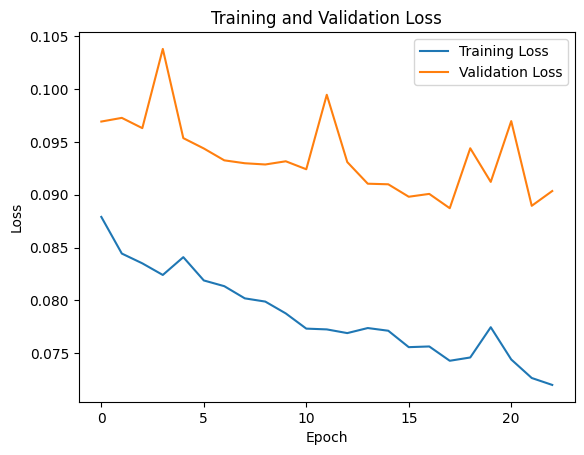

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_generator = ImageDataGenerator(rescale=1)
flow_test_gen = test_generator.flow(X_test_br, Y_test_br, batch_size=16, shuffle=False)
model3.evaluate(flow_test_gen) # loss, accuarcy

14/14 [==============================] - 1s 72ms/step - loss: 0.0751 - f1_score: 0.2260


[0.07511857151985168, 0.22601749002933502]

In [ ]:
# IoU 평가

from keras.models import load_model
from keras.metrics import MeanIoU
from sklearn.metrics import classification_report

# Load the trained U-Net model
#model = load_model('path/to/your/unet_model.h5')

# Assuming x_test and y_test are your test data and corresponding ground truth masks
predictions = model3.predict(X_test_br)

# Convert predictions and ground truth to binary masks (0 or 1)
predictions_binary = (predictions > 0.5).astype(int)
y_test_binary = (Y_test_br > 0.5).astype(int)

# Calculate metrics
iou = MeanIoU(num_classes=2)
iou.update_state(Y_test_br, predictions)
iou_result = iou.result().numpy()


7/7 [==============================] - 1s 142ms/step


In [ ]:
iou_result

0.47542378

1/1 [==============================] - 0s 18ms/step


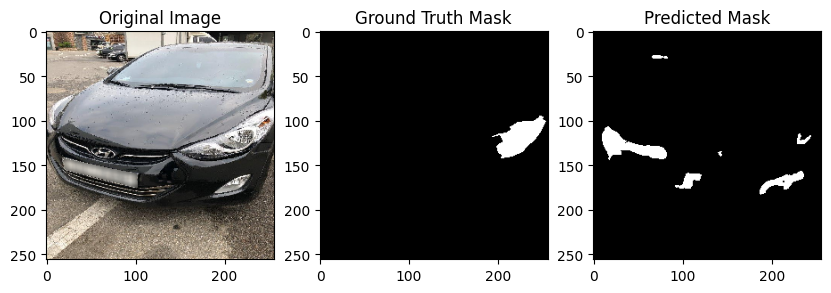

In [ ]:
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model

# Assuming x_test and y_test are your test data and corresponding ground truth masks
image_index = 51 # Choose an index from your test set

# Get the input image and ground truth mask
input_image = X_test_br[image_index]
ground_truth_mask = Y_test_br[image_index]

# Reshape the input image to (1, height, width, channels)
input_image = np.expand_dims(input_image, axis=0)

# Predict the mask
predicted_mask = model3.predict(input_image)[0]

# Threshold the predicted mask (adjust threshold as needed)
predicted_mask_binary = (predicted_mask > 0.55).astype(np.uint8)
predicted_mask_binary = predicted_mask_binary*255

# Display the images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(input_image[0])  # Assuming input_image[0] is the original image
plt.title('Original Image')

# Ground Truth Mask
plt.subplot(1, 3, 2)
plt.imshow(ground_truth_mask, cmap='gray')
plt.title('Ground Truth Mask')

# Predicted Mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')

plt.show()

## VGG encoder unet model ##

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def create_unet_with_vgg16_encoder(input_shape=(256, 256, 3), num_classes=1):
    # Load pre-trained VGG16 model
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Extract features from VGG16
    encoder_output = vgg16_base.get_layer('block4_pool').output  # Adjust based on your requirements

    # Decoder (U-Net)
    up6 = UpSampling2D(size=(2, 2))(encoder_output)
    merge6 = concatenate([vgg16_base.get_layer('block3_pool').output, up6], axis=3)
    conv6 = Conv2D(512, 2, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    merge7 = concatenate([vgg16_base.get_layer('block2_pool').output, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    merge8 = concatenate([vgg16_base.get_layer('block1_pool').output, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    merge9 = concatenate([vgg16_base.get_layer('block1_conv2').output, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output Layer
    output = Conv2D(num_classes, 1, activation='sigmoid')(conv9)

    model = Model(inputs=vgg16_base.input, outputs=output)

    # Freeze VGG16 layers during training
    for layer in vgg16_base.layers:
        layer.trainable = True

    return model

# Instantiate the model
model = create_unet_with_vgg16_encoder()

# Display the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 256, 256, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 256, 256, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

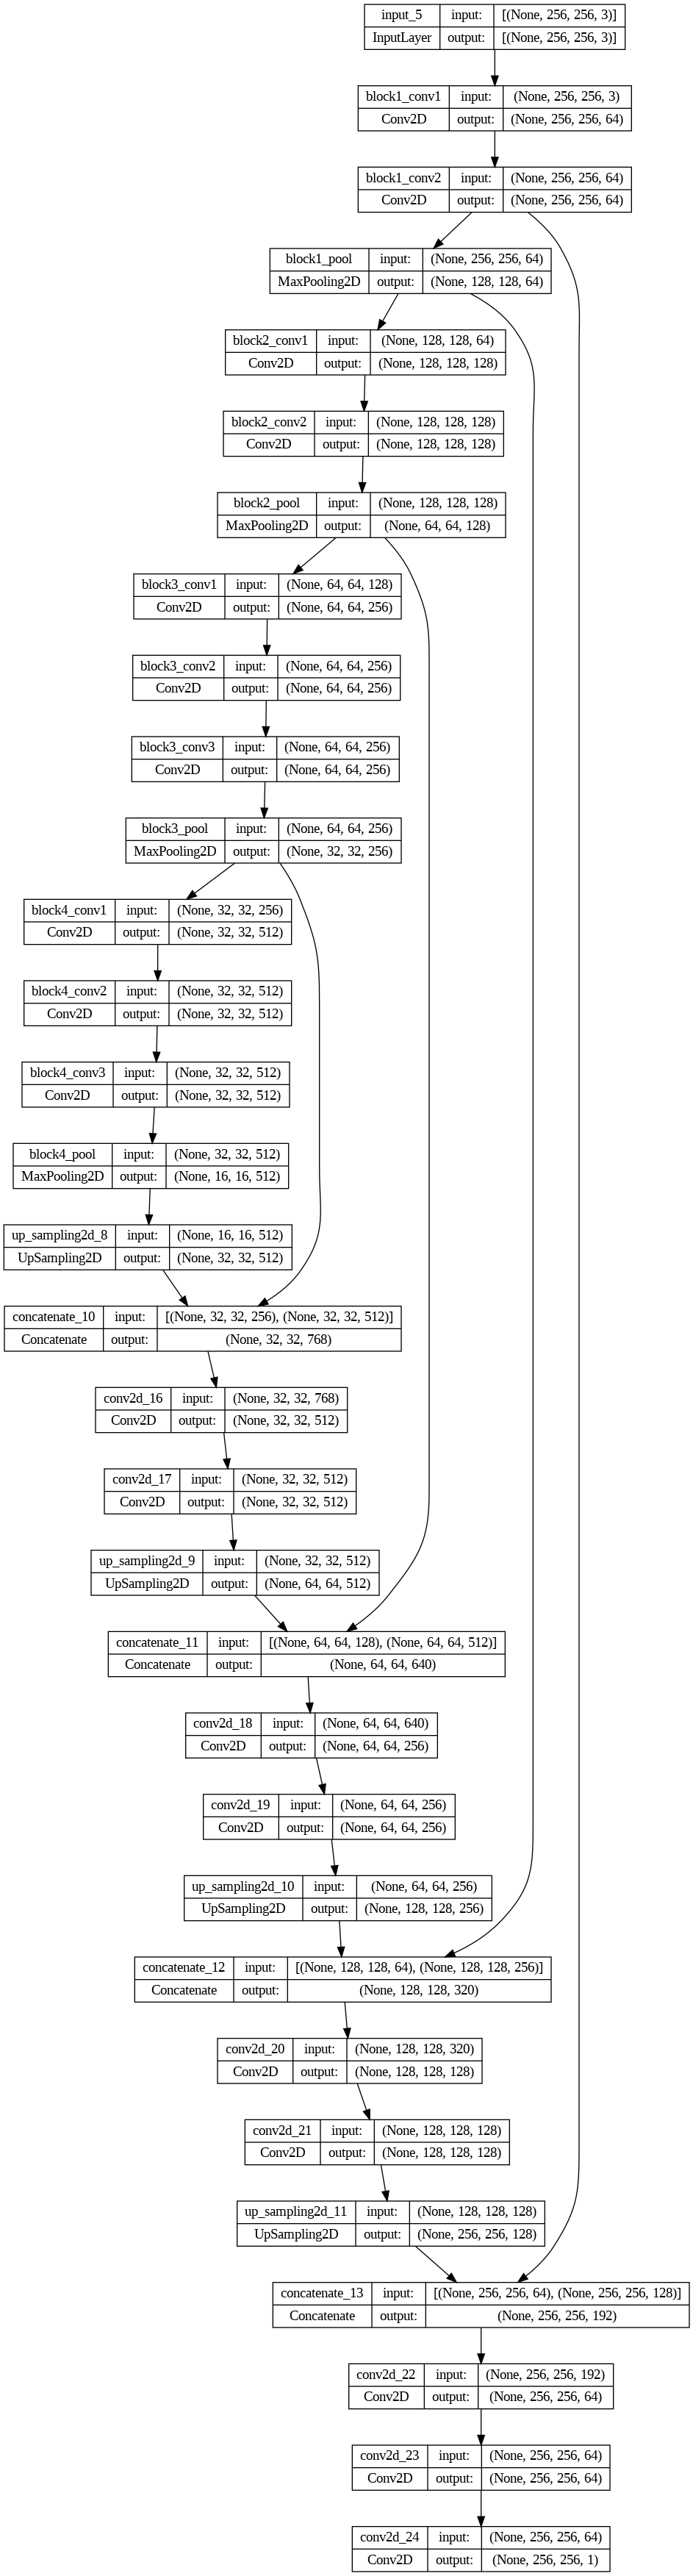

In [ ]:
tf.keras.utils.plot_model(model5, show_shapes=True)

## MobileNetV3 ##

In [ ]:
# MobileNetV3
from pickle import TRUE
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Conv2D, UpSampling2D

# Load MobileNetV3-Small model with pre-trained weights
mobilenetv3_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the weights of the MobileNetV3 model
mobilenetv3_model.trainable = TRUE

# Create a new model with modified output shape
output_shape = (256, 256, 1)

# Add additional layers to adapt the output shape
modified_model7 = tf.keras.Sequential([
    mobilenetv3_model,
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    UpSampling2D(size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    UpSampling2D(size=(2, 2)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    UpSampling2D(size=(2, 2)),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    UpSampling2D(size=(2, 2)),
    Conv2D(8, (3, 3), padding='same', activation='relu'),
    Conv2D(8, (3, 3), padding='same', activation='relu'),
    UpSampling2D(size=(2, 2)),
    Conv2D(1, (1, 1), padding='same', activation='sigmoid')  # Adjust activation based on your task
])

# Display the modified model summary
modified_model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 8, 8, 576)         939120    
 al)                                                             
                                                                 
 conv2d_59 (Conv2D)          (None, 8, 8, 128)         663680    
                                                                 
 up_sampling2d_31 (UpSampli  (None, 16, 16, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 16, 16, 64)        73792     
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 up_sampling2d_32 (UpSampli  (None, 32, 32, 64)       

## keras vgg16_unet model ##

In [ ]:
!pip install keras-segmentation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 33.6 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29057 sha256=bbbab0bcaf15ba0902f61f2b017b6855c9c1fc0f70930515febdb7ec5fb26f80
  Stored in directory: /root/.cache/pip/wheels/2a/87/5b/ddc104c262fe1280e0565a2cc1b9b6b04963af12e462cdf068
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0


In [ ]:
#https://github.com/divamgupta/image-segmentation-keras

from keras_segmentation.models.unet import vgg_unet
from keras.layers import UpSampling2D, Conv2D, Dropout
import tensorflow as tf
vgg_u = vgg_unet(n_classes=1 ,  input_height=224, input_width=224)
vgg_unet_cus = tf.keras.models.Model(
     vgg_u.input ,
     vgg_u.layers[ -4 ].output
)

model = tf.keras.Sequential([
    vgg_unet_cus,
    UpSampling2D(size=(2, 2)),
    Conv2D(64, 3, activation='relu', padding='same'),
    Dropout(0.4, seed=42),  # 드롭아웃 추가
    Conv2D(64, 3, activation='relu', padding='same'),
    Dropout(0.4, seed=42),  # 드롭아웃 추가
    Conv2D(1, 1, activation='sigmoid')
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_89 (Functional)       (None, 112, 112, 64)      12321792  
                                                                 
 up_sampling2d_71 (UpSampli  (None, 224, 224, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 dropout_34 (Dropout)        (None, 224, 224, 64)      0         
                                                                 
 conv2d_142 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 dropout_35 (Dropout)        (None, 224, 224, 64)      0         
                                                     

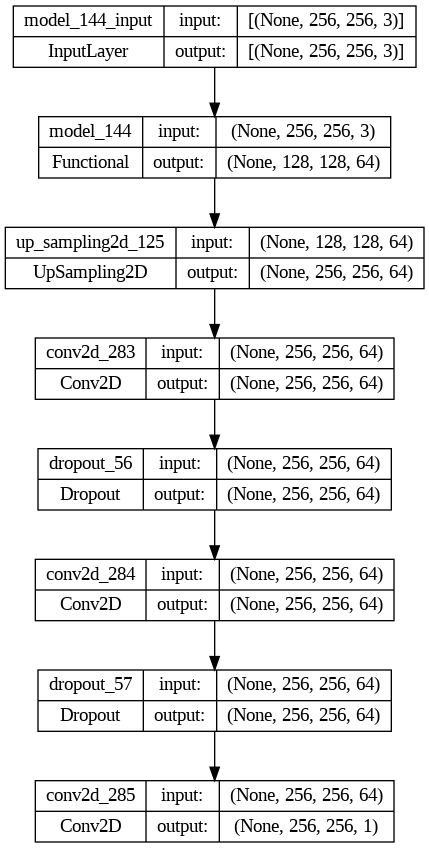

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## keras example - MobileNetV2(encoder), pix2pix(decoder)##

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-_qfan5e0
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-_qfan5e0
  Resolved https://github.com/tensorflow/examples.git to commit 0b14ce1c88537b94772cc99d995d936417be6f5d
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1699471818.63262868223049538191520590201343318150499692381-py3-none-any.whl size=301553 sha256=7824ced2f6c613f3b91d4d2743bc7310889711a6a13324928a343345dc1a3bdc
  Stored in directory: /tmp/pip-ephem-wheel-cache-xz7acfs7/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples
ERROR: Operation cancelled by user


In [ ]:
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix

ModuleNotFoundError: ignored

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
model3 = unet_model(output_channels=1)

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True)

## keras resnet_unet model ##

In [ ]:
pip install keras-segmentation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 35.3 MB/s eta 0:00:00
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29057 sha256=91a7dc22dcff688ce87a51ae33d2d318093ba524c8359d3c369359bdfcb98c25
  Stored in directory: /root/.cache/pip/wheels/2a/87/5b/ddc104c262fe1280e0565a2cc1b9b6b04963af12e462cdf068
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0


In [ ]:
from keras_segmentation.models.unet import resnet50_unet
from tensorflow.keras.layers import UpSampling2D, Conv2D, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.regularizers import l2

# ResNet50 모델 로드 (ImageNet 가중치 포함)
base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# resnet50_unet 모델 생성 (사용자 지정 가중치 포함)
res_u = resnet50_unet(n_classes=1, input_height=256, input_width=256)

# ResNet50의 가중치를 resnet50_unet의 기본 레이어에 적용
for layer in base_resnet50.layers:
    if layer.name in res_u.layers:
        res_u.get_layer(layer.name).set_weights(layer.get_weights())

res50_unet_cus = tf.keras.models.Model(
     res_u.input ,
     res_u.layers[ -4 ].output
)

# UpSampling 부분
model = tf.keras.Sequential([
    res50_unet_cus,
    UpSampling2D(size=(2, 2)),
    Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=l2(0.00001)), # L2 정규화
    Dropout(0.4, seed=42), # 드롭아웃 비율 설정
    Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=l2(0.00001)),
    Dropout(0.4, seed=42),
    Conv2D(1, 1, activation='sigmoid')
])

model.summary()

94653016/94653016 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_4 (Functional)        (None, 128, 128, 64)      16372288  
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 256, 256, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 dropout (Dropout)           (None, 256, 256, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 dropout_1 (Dropout)         (None, 256, 256, 64)      0 

## keras vgg_segnet ##

In [ ]:
from keras_segmentation.models.segnet import vgg_segnet

vseg = vgg_segnet(n_classes=1 ,  input_height=256, input_width=256)
vseg_cus = tf.keras.models.Model(
     vseg.input ,
     vseg.layers[ -4 ].output
)

model16 = tf.keras.Sequential([
    vseg_cus,
    UpSampling2D(size=(2, 2)),  # Global average pooling layer if needed
    Conv2D(64, 3, activation='relu', padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    Conv2D(1, 1, activation='sigmoid')
])

model16.summary()

## keras resnet_segnet ##

In [ ]:
from keras_segmentation.models.segnet import resnet50_segnet
from tensorflow.keras.layers import UpSampling2D, Conv2D, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# ResNet50 모델 로드 (ImageNet 가중치 포함)
base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

rseg = resnet50_segnet(n_classes=1 ,  input_height=256, input_width=256)

# ResNet50의 가중치를 resnet50_unet의 기본 레이어에 적용
# 참고: 모든 레이어 이름과 구조가 호환되는지 확인해야 합니다.
for layer in base_resnet50.layers:
    if layer.name in rseg.layers:
        rseg.get_layer(layer.name).set_weights(layer.get_weights())


rseg_cus = tf.keras.models.Model(
     rseg.input ,
     rseg.layers[ -4 ].output
)

model = tf.keras.Sequential([
    rseg_cus,
    UpSampling2D(size=(2, 2)),
    Conv2D(64, 3, activation='relu', padding='same'),
    Dropout(0.4, seed=42),  # 드롭아웃 추가
    Conv2D(64, 3, activation='relu', padding='same'),
    Dropout(0.4, seed=42),  # 드롭아웃 추가
    Conv2D(1, 1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_19 (Functional)       (None, 128, 128, 64)      14860864  
                                                                 
 up_sampling2d_15 (UpSampli  (None, 256, 256, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 dropout_6 (Dropout)         (None, 256, 256, 64)      0         
                                                                 
 conv2d_30 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 dropout_7 (Dropout)         (None, 256, 256, 64)      0         
                                                      

## keras segnet ##

In [ ]:
from keras_segmentation.models.segnet import segnet

seg = segnet(n_classes=1 ,  input_height=256, input_width=256)
seg_cus = tf.keras.models.Model(
     seg.input ,
     seg.layers[ -4 ].output
)

model2 = tf.keras.Sequential([
    seg_cus,
    UpSampling2D(size=(2, 2)),  # Global average pooling layer if needed
    Conv2D(64, 3, activation='relu', padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    Conv2D(1, 1, activation='sigmoid')
])

model2.summary()

## 학습 및 평가 ##

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.optimizers import Adam , RMSprop

In [ ]:
# 모델 컴파일링

model.compile(
    optimizer=Adam(learning_rate=0.0001), # 최적화 방법, 학습률 설정
    loss = weighted_binary_crossentropy,  # 손실함수 설정
    metrics=[f1s(threshold=0.7)], # 검증 지표 및 threshold 설정
)

# 콜백 설정
rlr = ReduceLROnPlateau(monitor='val_f1_score', factor=0.5, patience=2, mode='max', verbose=1)
ely = EarlyStopping(monitor='val_f1_score', patience=4, mode='max', verbose=1)

In [ ]:
import os
# best 모델 저장을 위한 체크포인트 설정
checkpoint_path = "/content/drive/MyDrive/breakage/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 베스트 모델만 저장하기 위한 콜백 생성
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False, # 모델 전체 저장
                                                 monitor='val_f1_score',
                                                 mode='max', # 검증 지표가 가장 큰 모델 저장
                                                 save_best_only=True, # best만 저장
                                                 verbose=1)

history = model.fit(flow_tr_gen, epochs=30, validation_data = flow_val_gen, callbacks=[cp_callback,rlr,ely]) # 학습

Epoch 1/30
200/200 [==============================] - ETA: 0s - loss: 0.0363 - f1_score: 0.3910
Epoch 1: val_f1_score improved from -inf to 0.00000, saving model to /content/drive/MyDrive/separated/cp.ckpt
200/200 [==============================] - 143s 529ms/step - loss: 0.0363 - f1_score: 0.3910 - val_loss: 0.3497 - val_f1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/30
200/200 [==============================] - ETA: 0s - loss: 0.0244 - f1_score: 0.5354
Epoch 2: val_f1_score improved from 0.00000 to 0.00946, saving model to /content/drive/MyDrive/separated/cp.ckpt
200/200 [==============================] - 103s 516ms/step - loss: 0.0244 - f1_score: 0.5354 - val_loss: 0.2181 - val_f1_score: 0.0095 - lr: 1.0000e-04
Epoch 3/30
200/200 [==============================] - ETA: 0s - loss: 0.0190 - f1_score: 0.6063
Epoch 3: val_f1_score improved from 0.00946 to 0.15903, saving model to /content/drive/MyDrive/separated/cp.ckpt
200/200 [==============================] - 104s 520ms/step - loss: 0

In [ ]:
import matplotlib.pyplot as plt

# 학습 과정 loss와 metric 변화 plotting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_f1_score'], label='Validation f1')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 성능 IoU, f1 평가

#from keras.models import load_model
from keras.metrics import MeanIoU
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model
custom_objects = {
    'f1_score': f1s(0.7),
    'weighted_binary_crossentropy': weighted_binary_crossentropy
}
# Load the model
model=load_model(checkpoint_path,custom_objects=custom_objects)

# 모델로 분류 실행
predictions = model.predict(X_test)

# 예측 값과 truth 값 마스크 생성
predictions_binary = (predictions > 0.7).astype(int)
y_test_binary = (Y_test > 0.7).astype(int)

# 평가지표 계산
f1_ = f1_score(y_test_binary.flatten(), predictions_binary.flatten())
iou = MeanIoU(num_classes=2)
iou.update_state(Y_test, predictions_binary)
iou_result = iou.result().numpy()

22/22 [==============================] - 4s 76ms/step


In [ ]:
print(iou_result,f1_)

0.6696011 0.5698734855001054


# 학습+검증데이터 재학습

In [ ]:

X_combined = np.concatenate((X_train, X_val))
Y_combined = np.concatenate((Y_train, Y_val))
test_generator = ImageDataGenerator(rescale=1)
flow_test_gen = test_generator.flow(X_test, Y_test, batch_size=28, shuffle=False, seed = 42)


model.compile(
    optimizer=Adam(learning_rate=0.00005),
    loss = weighted_binary_crossentropy,
    metrics=[f1s(threshold=0.7)],
)


# 합친 데이터셋으로 ImageDataGenerator 생성
combined_generator = train_generator.flow(X_combined, Y_combined, batch_size=28, shuffle=True, seed=42) # 검증과정에서 성능이 안정화되었던 매개변수 값 설정


In [ ]:
history = model.fit(combined_generator, epochs=20, validation_data = flow_test_gen) # 재학습

Epoch 1/20
225/225 [==============================] - 93s 230ms/step - loss: 0.0646 - f1_score: 0.3509 - val_loss: 0.3484 - val_f1_score: 7.9669e-07
Epoch 2/20
225/225 [==============================] - 49s 218ms/step - loss: 0.0470 - f1_score: 0.4520 - val_loss: 0.1897 - val_f1_score: 0.1351
Epoch 3/20
225/225 [==============================] - 49s 219ms/step - loss: 0.0352 - f1_score: 0.5371 - val_loss: 0.1337 - val_f1_score: 0.3146
Epoch 4/20
225/225 [==============================] - 49s 219ms/step - loss: 0.0279 - f1_score: 0.6026 - val_loss: 0.0860 - val_f1_score: 0.4451
Epoch 5/20
225/225 [==============================] - 49s 219ms/step - loss: 0.0224 - f1_score: 0.6608 - val_loss: 0.0698 - val_f1_score: 0.4606
Epoch 6/20
225/225 [==============================] - 49s 219ms/step - loss: 0.0191 - f1_score: 0.6972 - val_loss: 0.0930 - val_f1_score: 0.5096
Epoch 7/20
225/225 [==============================] - 49s 219ms/step - loss: 0.0169 - f1_score: 0.7224 - val_loss: 0.1116 - va

In [ ]:
# 테스트 성능 IoU, f1 평가

#from keras.models import load_model
from keras.metrics import MeanIoU
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model
custom_objects = {
    'f1_score': f1s(0.7),
    'weighted_binary_crossentropy': weighted_binary_crossentropy
}
# Load the model
model=load_model(checkpoint_path,custom_objects=custom_objects)

# 모델로 분류 실행
predictions = model.predict(X_test)

# 예측 값과 truth 값 마스크 생성
predictions_binary = (predictions > 0.7).astype(int)
y_test_binary = (Y_test > 0.7).astype(int)

# 평가지표 계산
f1_ = f1_score(y_test_binary.flatten(), predictions_binary.flatten())
iou = MeanIoU(num_classes=2)
iou.update_state(Y_test, predictions_binary)
iou_result = iou.result().numpy()

16/16 [==============================] - 4s 87ms/step


In [ ]:
print(iou_result,f1_)

0.63627464 0.5481472230843679
